In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Ellipse
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi

In [130]:
subset = ['control', 'test', 'test_N', 'difference', 'bca_low', 'bca_high']
allCX_dat = pd.read_csv('D:/_2021_08_screen/S1fu/cx10_allrefs.csv', usecols=subset)

def subset_refs(df, ref):
    dat = df.loc[allCX_dat['control']== ref]
    dat =dat.sort_values('difference')
    dat = dat.reset_index(drop=True)
    return dat

In [136]:
CX_DMSO_dat = subset_refs(allCX_dat, 'DMSO')


In [137]:
CX_DMSO_dat.loc[CX_DMSO_dat['test']=='H2O']
line = pd.DataFrame({"control": "DMSO", "test": "DMSO", 'test_N':"NaN", "difference":"NaN", "bca_low":"NaN", "bca_high":"NaN"}, index=[24])
all_CXdat = pd.concat([CX_DMSO_dat.iloc[:23], line, CX_DMSO_dat.iloc[23:]]).reset_index(drop=True)
all_CXdat

,control,test,test_N,difference,bca_low,bca_high
0,DMSO,Piperonyl Alcohol,962,-4.668955,-6.084775,-3.310672
1,DMSO,Guaiazulene,1166,-3.083944,-4.408694,-1.812303
2,DMSO,2-nonanone,1164,-2.832925,-4.083511,-1.461292
3,DMSO,"2,5-Dihydroxybenzoic acid",1181,-2.496552,-3.791367,-1.152438
4,DMSO,Oleanolic Acid,1185,-2.42962,-3.700726,-1.077065
5,DMSO,Solasodine,1378,-1.751082,-3.058797,-0.531456
6,DMSO,Salvinorin A Propionate,1323,-1.708914,-2.985302,-0.431504
7,DMSO,1-octanol,806,-1.570782,-2.962238,-0.16928
8,DMSO,Sinomenine hydrochloride,1335,-1.194771,-2.457,0.052397
9,DMSO,Leonurine,1384,-0.964197,-2.208573,0.265142


In [138]:
CX_order = list(all_CXdat['test'])

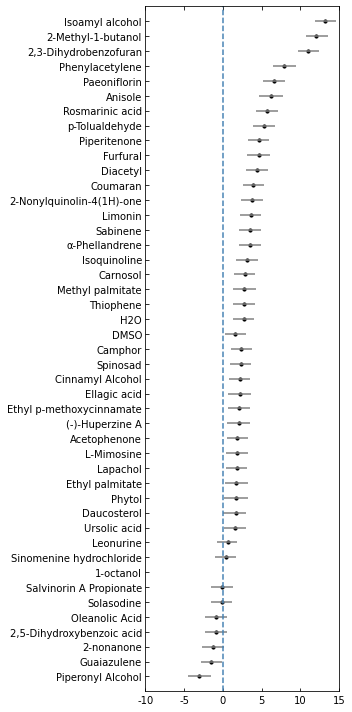

In [148]:
plot_ref(allCX_dat, '1-octanol', 'CX10', CX_order, -10, 20 )

In [117]:
def plot_ref(df, control, strain, ordr, low_lim, up_lim):
    positions = list(range(0,45))
    ref_dat = df.loc[df['control']==control]
    ref_dat = ref_dat.set_index('test')
    
    reordered = ref_dat.reindex(ordr)
    reordered = reordered.reset_index()
    
    lines = []
    for index, row in reordered.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines.append(line)
        
    ytick_labels = list(reordered['test'])
    mdiffs = list(reordered['difference'])
    
    fig, ax = plt.subplots(figsize=(5,10)) 

    hln_coll = mpl.collections.LineCollection(lines, colors='gray')
    ax = plt.gca()
    
    x_positions = list(np.arange(low_lim, up_lim, 5))
    
    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_ticks_position('both')
    #minor_locator = AutoMinorLocator(5)
    #ax.xaxis.set_minor_locator(minor_locator)
    ax.add_collection(hln_coll)
    ax.scatter(mdiffs, positions, s=10, c='black')
    ax.tick_params(axis='both', tickdir='in')
    plt.axvline(0, ls='--', c='steelblue')
    ax.set_xlim(low_lim, (up_lim-5))    
    ax.set_ylim(-1, 45)
    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('D:/NP_manuscript/'+ strain + '_' + control + '_mdiffPlot.svg')



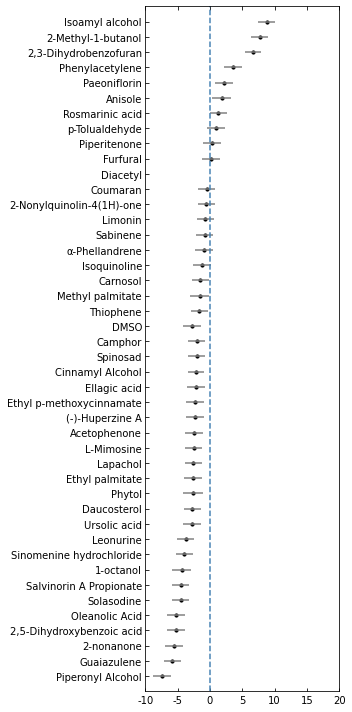

In [64]:
order = ['DMSO' if x=='H2O' else x for x in tick_labels]


In [90]:
PRdat = pd.read_csv('D:/_2021_08_screen/S1fu/PR678_allrefs.csv', usecols=subset)

In [107]:
#PR_DMSO_dat =subset_refs(PRdat, 'DMSO')
PR_order = list(all_PRdat['test'])

In [94]:
#PR_ord = ['DMSO' if x=='H2O' else x for x in PR_order]

In [103]:
PR_DMSO_dat.loc[PR_DMSO_dat['test']=='H2O']

,control,test,test_N,difference,bca_low,bca_high
31,DMSO,H2O,523,3.815697,2.391063,5.156433


In [110]:
line = pd.DataFrame({"control": "DMSO", "test": "DMSO", 'test_N':"NaN", "difference":"NaN", "bca_low":"NaN", "bca_high":"NaN"}, index=[32])
all_PRdat = pd.concat([PR_DMSO_dat.iloc[:31], line, PR_DMSO_dat.iloc[31:]]).reset_index(drop=True)
all_PRdat

,control,test,test_N,difference,bca_low,bca_high
0,DMSO,2-nonanone,767,-6.325735,-7.514221,-5.133704
1,DMSO,Acetophenone,636,-4.155159,-5.440198,-2.909975
2,DMSO,1-octanol,668,-3.953032,-5.293354,-2.707069
3,DMSO,Furfural,574,-1.759839,-3.071465,-0.421773
4,DMSO,p-Tolualdehyde,734,-0.583399,-1.81514,0.656114
5,DMSO,Rosmarinic acid,888,0.117966,-1.10125,1.359424
6,DMSO,Ethyl p-methoxycinnamate,620,0.164257,-1.115178,1.434781
7,DMSO,"2,5-Dihydroxybenzoic acid",922,0.880524,-0.345052,2.056299
8,DMSO,Lapachol,612,0.947992,-0.45283,2.339035
9,DMSO,Guaiazulene,929,1.194715,-0.03758,2.338974


In [ ]:
DataFrame({"onset": 30.0, "length": 1.3}, index=[3])